# Introduction

Author: Tianyi Miao

In this Colab notebook, I will perform an explorartory data analysis on the Home Credit Default Risk dataset. If you want to modify this file, please save your own copy in your own drive and **don't modify this file in place**.

Let me know if you have any questions.

**Dataset**: https://www.kaggle.com/competitions/home-credit-default-risk/data



# Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', readonly=True)


Mounted at /content/drive


In [5]:
import os
drive_zip_dir = "'/content/drive/Shareddrives/CIS-5500 Final Project (2023 Fall)/home-credit-default-risk.zip'"
local_datasets_dir = "/content/data/" # move to this directory for training/testing

!unzip {drive_zip_dir} -d {local_datasets_dir}

Archive:  /content/drive/Shareddrives/CIS-5500 Final Project (2023 Fall)/home-credit-default-risk.zip
  inflating: /content/data/HomeCredit_columns_description.csv  
  inflating: /content/data/POS_CASH_balance.csv  
  inflating: /content/data/application_test.csv  
  inflating: /content/data/application_train.csv  
  inflating: /content/data/bureau.csv  
  inflating: /content/data/bureau_balance.csv  
  inflating: /content/data/credit_card_balance.csv  
  inflating: /content/data/installments_payments.csv  
  inflating: /content/data/previous_application.csv  
  inflating: /content/data/sample_submission.csv  


In [6]:
os.listdir(local_datasets_dir)

['application_test.csv',
 'sample_submission.csv',
 'bureau_balance.csv',
 'previous_application.csv',
 'credit_card_balance.csv',
 'POS_CASH_balance.csv',
 'bureau.csv',
 'installments_payments.csv',
 'application_train.csv',
 'HomeCredit_columns_description.csv']

In [13]:
import pandas as pd
d = {}
for file_name in os.listdir(local_datasets_dir):
    key = os.path.splitext(file_name)[0]
    d[key] = pd.read_csv(open(os.path.join(local_datasets_dir, file_name), errors="ignore"))

UnicodeDecodeError: ignored

In [20]:
desc_path = os.path.join(local_datasets_dir, "HomeCredit_columns_description.csv")
desc_df = pd.read_csv(open(desc_path, errors="ignore"))

In [21]:
desc_df

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [36]:
for table_name in d.keys():
    if table_name not in ("sample_submission"):
        print(table_name, d[table_name].shape, d[table_name].columns.tolist())

application_test (48744, 121) ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'C

- application: primary key SK_ID_CURR
- bureau: primary key (SK_ID_CURR, SK_ID_BUREAU), foreign key SK_ID_BUREAU
- bureau_balance: primary key (SK_ID_BUREAU, MONTHS_BALANCE)
- previous_application: primary key SK_ID_PREV, foreign key SK_ID_CURR
- credit_card_balance: primary key (SK_ID_PREV, MONTHS_BALANCE), foreign key SK_ID_CURR
- POS_CASH_balance: primary key (SK_ID_PREV, MONTHS_BALANCE), foreign key SK_ID_CURR
- installments_payments: foreign key SK_ID_PREV, SK_ID_CURR; no primary key (use integer index as primary key)
- `HomeCredit_columns_description`: metadata, primary key (Table, Row)


In [69]:
d["installments_payments"]["SK_ID_PREV"].nunique()

997752

In [72]:
d["installments_payments"][["SK_ID_PREV", "NUM_INSTALMENT_VERSION"]].drop_duplicates().shape

(1560516, 2)

In [71]:
print(sorted(d["installments_payments"]["NUM_INSTALMENT_VERSION"].drop_duplicates()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 61.0, 68.0, 72.0, 73.0, 178.0]


In [ ]:
# /content/data/HomeCredit_columns_description.csv

In [80]:
desc_df

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [79]:
desc_df[["Table", "Row"]].drop_duplicates().shape

(219, 2)

# More exploration

In [81]:
for table_name in d.keys():
    if table_name not in ("sample_submission"):
        print(table_name)

application_test
bureau_balance
previous_application
credit_card_balance
POS_CASH_balance
bureau
installments_payments
application_train


In [86]:
n_previous_applications = d["previous_application"].groupby("SK_ID_CURR")["SK_ID_PREV"].nunique()

In [92]:
n_previous_applications

SK_ID_CURR
100001    1
100002    1
100003    3
100004    1
100005    2
         ..
456251    1
456252    1
456253    2
456254    2
456255    8
Name: SK_ID_PREV, Length: 338857, dtype: int64

In [94]:
df_temp = d["application_train"].join(n_previous_applications, on="SK_ID_CURR")

In [99]:
joined_n_previous_app = df_temp["SK_ID_PREV"].fillna(0)

In [102]:
max(joined_n_previous_app)

73.0

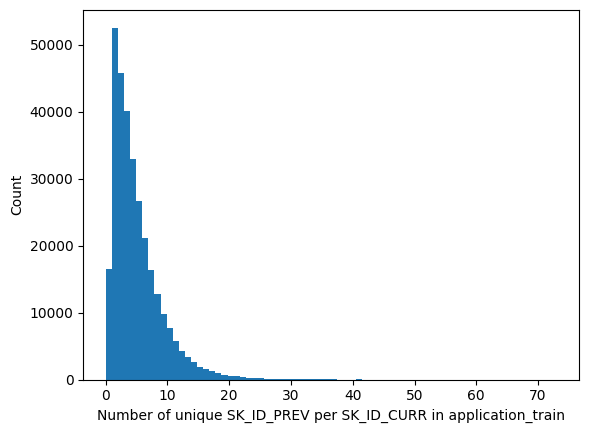

In [106]:
from matplotlib import pyplot as plt
plt.hist(joined_n_previous_app, bins=74)
plt.xlabel("Number of unique SK_ID_PREV per SK_ID_CURR in application_train")
plt.ylabel("Count")
plt.show()